In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('OIL.csv')

In [15]:
data.columns

Index(['OBJECTID', 'HELCOM_ID', 'Country', 'Year', 'Spill_ID', 'Latitude',
       'Longitude', 'Length__km', 'Width__km_', 'Area__km2_', 'Spill_cat',
       'EstimVol_m3', 'Vol_Category', 'Polluter', 'Date', 'Time_UTC', 'x', 'y',
       'Wind_speed', 'Wind_direc', 'FlightType', 'Remarks', 'Type_Substance'],
      dtype='object')

In [38]:
data['Polluter'] = data['Polluter'].str.replace('SHIP', 'Ship')
data['Polluter'] = data['Polluter'].str.replace('UNK', 'Unknown')

## Basic statistics

In [39]:
data[['Length__km',	'Width__km_', 'Area__km2_',	'EstimVol_m3']].describe()

,Length__km,Width__km_,Area__km2_,EstimVol_m3
count,353.000000,353.000000,359.000000,365.000000
mean,2.265340,0.467006,1.098095,0.237847
std,6.641417,1.394373,4.026853,1.263387
min,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.015000,0.003500,0.000885
50%,0.500000,0.060000,0.027000,0.005653
75%,2.000000,0.352000,0.356500,0.069440
max,69.680000,15.250000,45.175000,16.000000


In general there is a hudge variation in size of the oil spills (std much higher than mean) and there are some hardcore outliers. The lenght of spills is much larger than the witdth.

<Axes: >

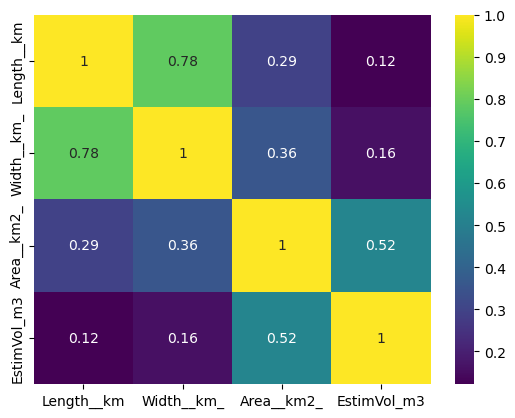

In [40]:
sns.heatmap(data[['Length__km',	'Width__km_', 'Area__km2_',	'EstimVol_m3']].corr(), cmap='viridis', annot=True)

## Main points:
- There is a very week correlation between area and the volume of the spill, so it would be difficult to predict the volume by just looking at the satelite images.
- On the other hand the width and length are much more correlated, so most spills should have similar shape. That might be usefull to assess possible spills by the shape.

<Axes: xlabel='Length__km', ylabel='Width__km_'>

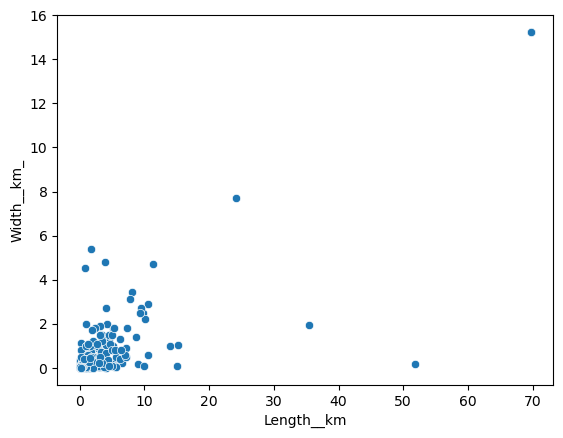

In [41]:
sns.scatterplot(data = data, x = 'Length__km', y = 'Width__km_')

As expected there are some outliers, in the next step I removed all spills longer than 20 km and wider than 6 km

In [42]:
filtered_data = data[(data['Length__km'] < 20) & (data['Width__km_'] < 6 )]

<Axes: xlabel='Length__km', ylabel='Width__km_'>

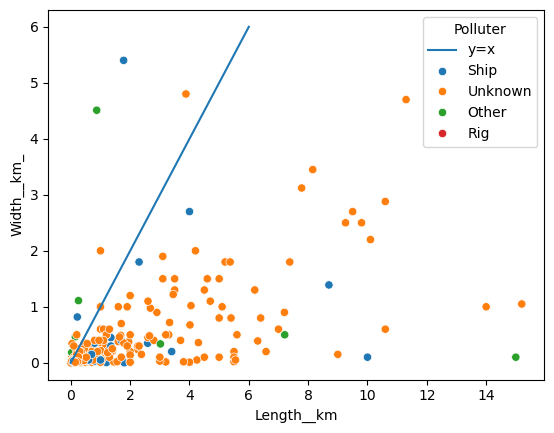

In [64]:
plt.plot([0,6],[0,6], label = 'y=x')
sns.scatterplot(data = filtered_data, x = 'Length__km', y = 'Width__km_', hue='Polluter')

There are cases where width is larger than lenght... Why? Also we can't tell much about source of pollution based on the shape